ARIMA models are able to handle trends in data but not able to handle seasonalities. To handle seasonality, we can use differencing. This is model is known as SARIMA

## SARIMA or Seasonal ARIMA 

	
SARIMA(p,d,q)(P,D,Q)m

* p: Trend autoregression order.
* d: Trend difference order.
* q: Trend moving average order.

**Seasonal Elements** -   
There are four seasonal elements that are not part of ARIMA that must be configured; they are:  

* P: Seasonal autoregressive order.
* D: Seasonal difference order.
* Q: Seasonal moving average order.
* m: The number of time steps for a single seasonal period. NOTE: Monthly seasonality, m=12 and weekly seasonailty in daily data, m=7

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

#from sklearn.metrics import mean_squared_error
#from pandas.plotting import lag_plot

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

from matplotlib import pyplot
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# We will load the airline data again

file = r'C:\Users\13134\Desktop\Time Series Analysis - Python\1. Time Series Analysis and Forecasting using Python\Forecasting\Data + Code\us-airlines-monthly-aircraft-miles-flown.csv'

miles_data = pd.read_csv(file, header=0, parse_dates=[0])

miles_data.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [3]:
# Set the index (first column) to the month

miles_data.index = miles_data['Month'] 

In [4]:
miles_data.head()

,Month,MilesMM
Month,,
1963-01-01,1963-01-01,6827
1963-02-01,1963-02-01,6178
1963-03-01,1963-03-01,7084
1963-04-01,1963-04-01,8162
1963-05-01,1963-05-01,8462


In [5]:
miles_data.tail()

,Month,MilesMM
Month,,
1970-08-01,1970-08-01,14057
1970-09-01,1970-09-01,16234
1970-10-01,1970-10-01,12389
1970-11-01,1970-11-01,11595
1970-12-01,1970-12-01,12772


- Our data values ends at  Dec 1, 1970. We will use our forecast model to predict values after Dec 1, 1970.

### Decomposing Time Series

**Additive Model** 

y(t) = Level + Trend + Seasonality + Noise

**Multiplicative Model** 

y(t) = Level * Trend * Seasonality * Noise

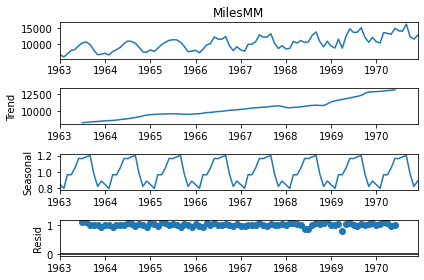

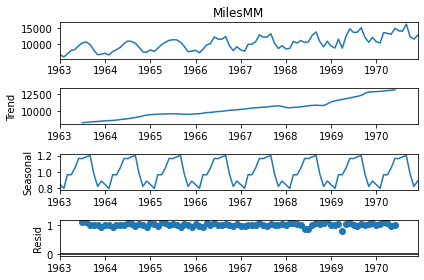

In [6]:
result_a = seasonal_decompose(miles_data['MilesMM'], model='multiplicative')
result_a.plot()

- From the `Observed graph (1st graph)`, we can see our raw data has some trend and seasonality.
- The `Trend graph (2nd graph)` shows us how the trendline is changing with time. It is also a linear trend and we need only one differencing to detrend the data
- The `Seasonality graph (3rd graph)`, shows that seasonality varies from 0.8 to 1.2. since we are using multiplication mode, we can say there is a 20% change in seasonality (1.0 - 0.8 = 0.2). This is high and we can conclude our data has high seasonality. Also, the seasonality cycle repeats year after year.

#### SARIMAX

We use SARIMA-X to allow for other variables to be included in our predictions. Example if you are to predict stock closing prices, you will need the history closing prices data and also the opening prices for the stock data.

In [7]:
# we use order 1 because we are differencing by only 1 (first differenc).
# We use seasonal order 12 because our seasonality is yearly (12 months from that data)
model = SARIMAX(miles_data['MilesMM'], order=(5,1,3), seasonal_order=(1,1,1,12))

C:\Users\13134\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\13134\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [8]:
model_fit = model.fit()

C:\Users\13134\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\13134\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\13134\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [9]:
residuals = model_fit.resid

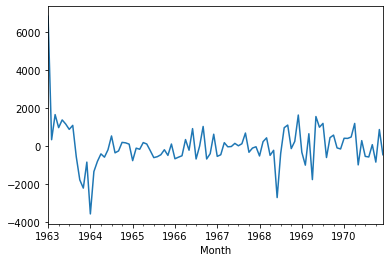

In [10]:
residuals.plot()

- The residuals are centered around zero and there is no trend and seasonality. This residual is like a white noise and we can conclude our model has extracted all the information from this datatset.

In [11]:
# Let's forecast the value for Jan 01, 1971

output = model_fit.forecast()

In [12]:
output

1971-01-01    11508.121486
Freq: MS, dtype: float64

In [13]:
# Let's forecast for 12 days

model_fit.forecast(12)

1971-01-01    11508.121486
1971-02-01    11236.748153
1971-03-01    13721.608768
1971-04-01    12768.686436
1971-05-01    14322.040360
1971-06-01    15764.971977
1971-07-01    14987.741743
1971-08-01    15391.305179
1971-09-01    16940.716966
1971-10-01    13653.545632
1971-11-01    12428.500722
1971-12-01    13725.521233
Freq: MS, dtype: float64

In [14]:
# Now let's predict our values from Jan 01, 1963 to Dec 1, 1970 and match it against our actual data values

yhat = model_fit.predict()

In [15]:
yhat.head()

1963-01-01       0.000000
1963-02-01    5841.873886
1963-03-01    5428.140099
1963-04-01    7191.242414
1963-05-01    7085.735330
Freq: MS, dtype: float64

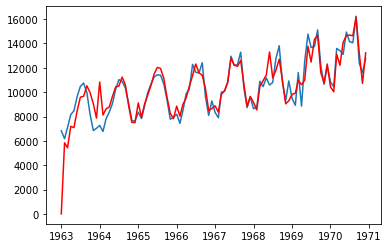

In [16]:
pyplot.plot(miles_data['MilesMM'])
pyplot.plot(yhat, color='red')

- The blue lines are the original data values and the red lines are our predicted values using our model. There is not so much variations in the two lines.